# **⭐ Classification Model to Identify Multiple Disease**

### Name - Yash Purusharthi

In [35]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [7]:
# import data
disease = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/MultipleDiseasePrediction.csv')

In [8]:
# view data
disease.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [9]:
# info of data
disease.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 133 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    itching                         4920 non-null   int64 
 1    skin_rash                       4920 non-null   int64 
 2    nodal_skin_eruptions            4920 non-null   int64 
 3    continuous_sneezing             4920 non-null   int64 
 4    shivering                       4920 non-null   int64 
 5    chills                          4920 non-null   int64 
 6    joint_pain                      4920 non-null   int64 
 7    stomach_pain                    4920 non-null   int64 
 8    acidity                         4920 non-null   int64 
 9    ulcers_on_tongue                4920 non-null   int64 
 10   muscle_wasting                  4920 non-null   int64 
 11   vomiting                        4920 non-null   int64 
 12   burning_micturition             

In [10]:
# summary statistics
disease.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# check for missing value
disease.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [12]:
# check for categories
disease.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [13]:
# correlation
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
disease.corr()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,diarrhoea,mild_fever,yellow_urine,yellowing_of_eyes,acute_liver_failure,fluid_overload,swelling_of_stomach,swelled_lymph_nodes,malaise,blurred_and_distorted_vision,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,weakness_in_limbs,fast_heart_rate,pain_during_bowel_movements,pain_in_anal_region,bloody_stool,irritation_in_anus,neck_pain,dizziness,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,swollen_extremeties,excessive_hunger,extra_marital_contacts,drying_and_tingling_lips,slurred_speech,knee_pain,hip_joint_pain,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,spinning_movements,loss_of_balance,unsteadiness,weakness_of_one_body_side,loss_of_smell,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,passage_of_gases,internal_itching,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,-0.059893,-0.057763,0.207896,0.350585,0.069744,-0.061573,-0.061573,-0.061573,-0.088129,0.091830,-0.088129,0.311436,-0.059893,-0.061573,-0.143855,0.037309,-0.059893,-0.126848,-0.159830,-0.059893,-0.086906,-0.067585,0.300936,0.253240,-0.069644,0.230103,-0.063212,-0.088129,-0.088129,0.263282,-0.143855,0.135127,0.361723,0.173673,-0.061573,NaN,-0.061573,0.138099,0.221299,-0.109271,-0.111317,-0.063212,-0.063212,-0.063212,-0.063212,-0.063212,-0.162283,-0.059893,-0.089338,-0.061573,-0.061573,-0.061573,-0.061573,-0.088129,-0.108237,-0.061573,-0.061573,-0.088129,-0.061573,-0.059893,-0.061573,-0.063212,-0.063212,-0.063212,-0.128701,-0.059893,-0.061573,-0.063212,-0.061573,-0.061573,-0.089338,-0.088129,-0.088129,-0.061573,-0.059893,-0.109271,-0.061573,-0.059893,-0.063212,-0.061573,-0.058170,-0.061573,-0.061573,-0.061573,-0.061573,-0.089338,-0.130537,-0.130537,-0.061573,0.226497,-0.061573,-0.090534,0.326439,-0.059893,-0.063212,-0.063212,-0.088129,-0.061573,-0.063212,-0.061573,-0.061573,0.372559,0.372559,-0.063212,-0.063212,-0.061573,-0.061573,-0.061573,-0.063212,-0.061573,-0.063212,-0.088129,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,-0.065324,-0.225046,0.166507,0.298143,-0.105248,-0.067156,-0.067156,-0.067156,-0.096120,-0.139363,-0.096120,0.067246,-0.065324,-0.067156,-0.156900,0.117059,-0.065324,-0.138350,-0.174323,-0.065324,-0.094786,0.053792,-0.207998,-0.157841,-0.090663,0.049731,0.341036,0.204714,-0.096120,-0.224648,-0.156900,0.110447,-0.067156,-0.194432,-0.067156,NaN,-0.067156,0.113396,0.174242,-0.119179,-0.121411,-0.068944,-0.068944,-0.068944,-0.068944,-0.068944,-0.176998,-0.065324,-0.097439,-0.067156,-0.067156,-0.067156,-0.067156,-0.096120,-0.118052,-0.067156,-0.067

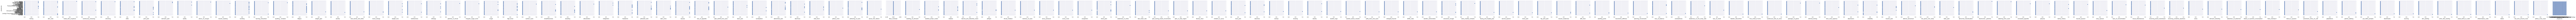

In [19]:
# visualize pairplot
sns.pairplot(disease, x_vars = disease.columns.tolist(), y_vars = 'prognosis')

In [20]:
# column names
for col in disease.columns :
    print(col)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [21]:
# define y
y = pd.DataFrame(disease['prognosis'])

In [22]:
# define X
x = disease.drop(['prognosis'],axis =1)

In [23]:
# split data
df_xtrain, df_xtest, df_ytrain, df_ytest = train_test_split(x,y,test_size =0.3, random_state = 1)

In [24]:
# verify shape
print(df_xtrain.shape,df_xtest.shape,df_ytrain.shape,df_ytest.shape)

(3444, 132) (1476, 132) (3444, 1) (1476, 1)


In [25]:
# select model
rf = RandomForestClassifier(random_state=1)

In [26]:
# train model
model_rf = rf.fit(df_xtrain, df_ytrain.values.ravel())

In [27]:
# predict with model
predictions_rf = model_rf.predict(df_xtest)
print(predictions_rf)

['Urinary tract infection' 'Gastroenteritis' 'Hypothyroidism' ...
 '(vertigo) Paroymsal  Positional Vertigo' 'Bronchial Asthma' 'Pneumonia']


In [28]:
# model accuracy
#Accuracy
print("Accuracy:",metrics.accuracy_score(df_ytest, predictions_rf))

Accuracy: 1.0


In [32]:
# model confusion matrix
cm_rf = confusion_matrix(df_ytest, predictions_rf)
cm_rf

array([[43,  0,  0, ...,  0,  0,  0],
       [ 0, 31,  0, ...,  0,  0,  0],
       [ 0,  0, 39, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 30,  0,  0],
       [ 0,  0,  0, ...,  0, 36,  0],
       [ 0,  0,  0, ...,  0,  0, 41]], dtype=int64)

In [36]:
# model classification report
print(classification_report(df_ytest, predictions_rf))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        43
                                   AIDS       1.00      1.00      1.00        31
                                   Acne       1.00      1.00      1.00        39
                    Alcoholic hepatitis       1.00      1.00      1.00        29
                                Allergy       1.00      1.00      1.00        40
                              Arthritis       1.00      1.00      1.00        35
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        34
                            Chicken pox       1.00      1.00      1.00        32
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        35
                           

In [37]:
# future prediction
X_new = df_xtest.loc[[1]]

In [38]:
#X_new
print(X_new)

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
1        0          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
1               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
1        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
1            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
1                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
1         0            0            0         0               0

In [39]:
# predict for X_new
predictions_rf_new = model_rf.predict(X_new)
print(predictions_rf_new)

['Fungal infection']


In [40]:
Y_new = df_ytest.loc[[1]]
print(Y_new)

#predictions_rf_new and Y_new are same

          prognosis
1  Fungal infection
